# Data analysis
Let's try to find some patterns in the data!

* Length of the text
* Amount of misspell, proportionally
* Amount of swear words, proportionally
* Laughs, proportionally


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
full_dataset3 = pd.read_csv('datasets\\full_dataset_3.csv')

## 1. Length of the text

<AxesSubplot:xlabel='hate_speech', ylabel='length'>

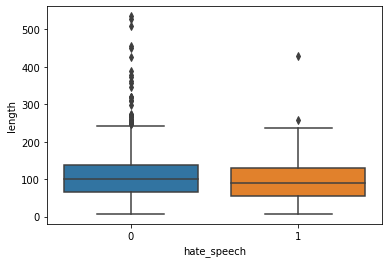

In [3]:
full_dataset3['length'] = full_dataset3['text'].apply(len)
sns.boxplot(x='hate_speech', y='length', data=full_dataset3)

## 2. Amount of misspell

### 2.1 preprocessing text

In [4]:
import nltk
stopwords = set(nltk.corpus.stopwords.words('portuguese')) # get stop words in portuguese
#nltk.download('stopwords')
#nltk.download('rslp')
from unidecode import unidecode

from spellchecker import SpellChecker
spell = SpellChecker(language='pt')

In [5]:
def remove_stopwords(text):
    text_without_stopwords = [word for word in text.split() if word not in stopwords]
    # some elements of the dataset were only stopwords (eg: "quando foi isso")
    # if it's the case, we'll return the same text as before
    if text_without_stopwords == []:
        return text
    return ' '.join(text_without_stopwords)

def cleaning_data(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'[0-9]', '', text)
    text = re.sub(r'rt+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[\"!$%&\'*+,-./<=>?\():;^_`#@{|}~]', '', text)
    text = unidecode(text) #remove accents (e.g.: á, ã, à will be "a")
    return text

def preprocessing(text):
    text = text.lower()
    text_cleaned = cleaning_data(text)
    text_stopwords = remove_stopwords(text_cleaned)
    #text_stemming = stemming(text_stopwords)
    return text_stopwords

In [6]:
full_dataset3['text_prec'] = full_dataset3['text'].apply(preprocessing)

In [7]:
def count_misspell(text):
    text = text.split()
    unknown_res = []
    for word in text:
        unknown_res.append(spell.unknown([word]) != set())
    return unknown_res.count(True)/len(text)

<AxesSubplot:xlabel='hate_speech', ylabel='count_misspell'>

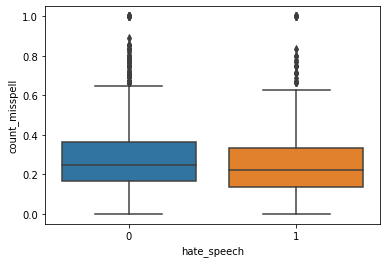

In [8]:
full_dataset3['count_misspell'] = full_dataset3['text'].apply(count_misspell)
sns.boxplot(x='hate_speech', y='count_misspell', data=full_dataset3)

## 3. Amount of swear words

In [9]:
f = open("datasets\\lista-palavroes-bloqueio.txt", "r", encoding="utf8")
list_swear_words = f.readlines()
list_swear_words = [x.strip() for x in list_swear_words]
f.close()


def count_swear_words(text):
    swear = []
    text = text.split(' ')
    for swear_word in list_swear_words:
        try:
            x = [re.findall('^' + swear_word.lower(), word) for word in text]
            x = [y for y in x if y != []]
            if x != []:
                swear.append(x[0][0])
        except:
            pass
    #if swear != []:
    #    swear = set(swear) # get the unique values
    return len(swear)/len(text)

<AxesSubplot:xlabel='hate_speech', ylabel='swear_words'>

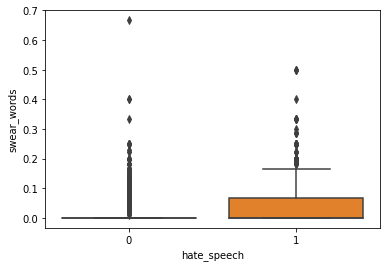

In [10]:
full_dataset3['swear_words'] = full_dataset3['text'].apply(count_swear_words)
sns.boxplot(x='hate_speech', y='swear_words', data=full_dataset3)

## 4. Amount of laughs

In [11]:
# get common portuguese laughs online, such as kkkkk, hahaha, hehe and rsrs
laughs = "k{2,}|a*ha+h[ha]*|e*he+h[he]*|s*rs+r[rs]*" # get regex for laughs
def count_laughs(text):
    all_laughs = re.findall(laughs, text)
    all_laughs = ''.join(all_laughs)
    return len(all_laughs)/len(text)

<AxesSubplot:xlabel='hate_speech', ylabel='laughs'>

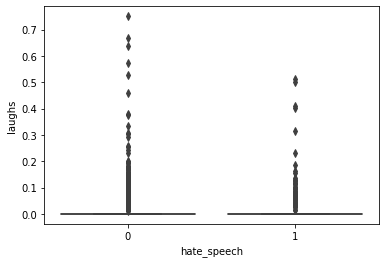

In [12]:
full_dataset3['laughs'] = full_dataset3['text'].apply(count_laughs)
sns.boxplot(x='hate_speech', y='laughs', data=full_dataset3)